In [71]:
import warnings
# silence warnings
warnings.filterwarnings("ignore")

from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [36]:
# Creating a Structural Model
sm = StructureModel()

In [41]:
data = pd.read_csv('../data/data_clean.csv')

In [42]:
X = data.iloc[:, 1:]
y = data["diagnosis"]

In [43]:
X["diagnosis"] = X["diagnosis"].apply(lambda x: 0 if x == "M" else 1)
X

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [44]:
sm_data= from_pandas(X, w_threshold=0.8)

In [45]:
node_attributes = {
    "diagnosis": {
        "shape": "star",
        "style": "filled",
        "width": 0.6,
        "penwidth": "1",
        "color": "#4a90e2d9",
        "orientation": 25,
    },
    "fontsize": 0.1
}

graph_attributes = {
    "scale": "1",
    "size": 5,
    "label": "Breast Cancer Causality",
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 25,
    "dpi": 200,
    "labeljust": "l",
    "labelloc": "t",
}

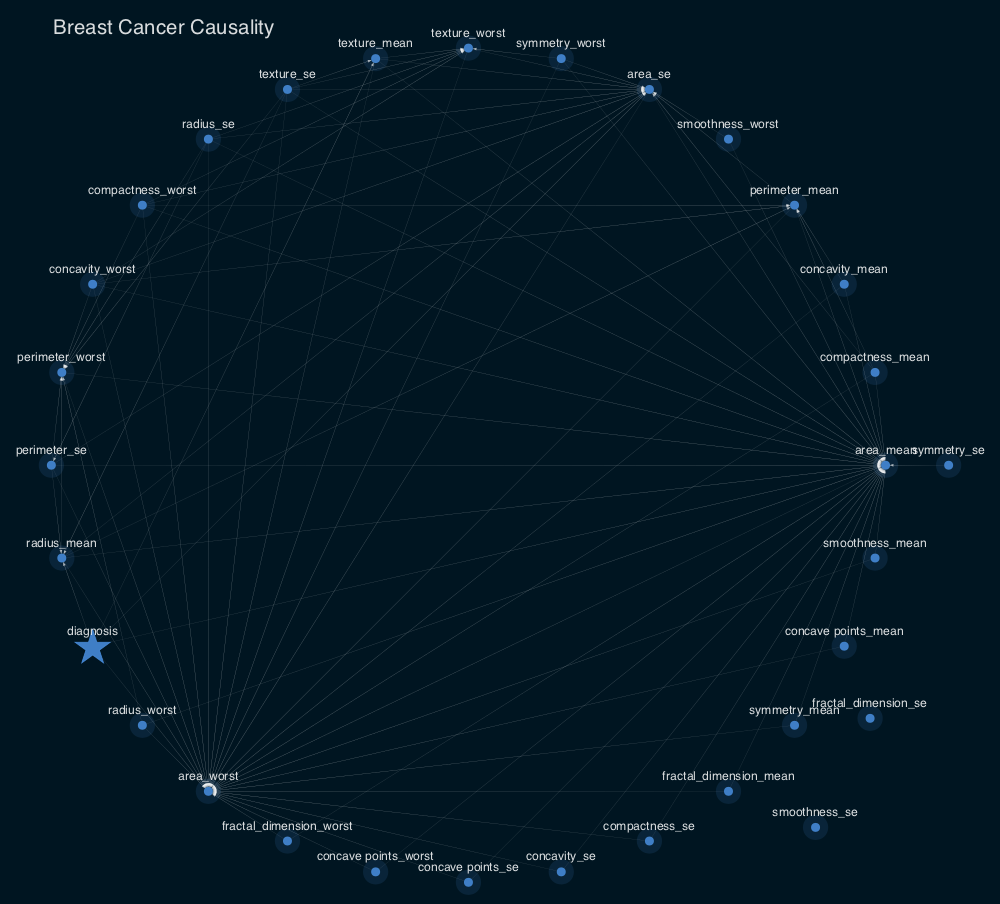

In [46]:
viz = plot_structure(
    sm_data,
    prog="circo",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    all_edge_attributes=EDGE_STYLE.WEAK)

Image(viz.draw(format='png'))

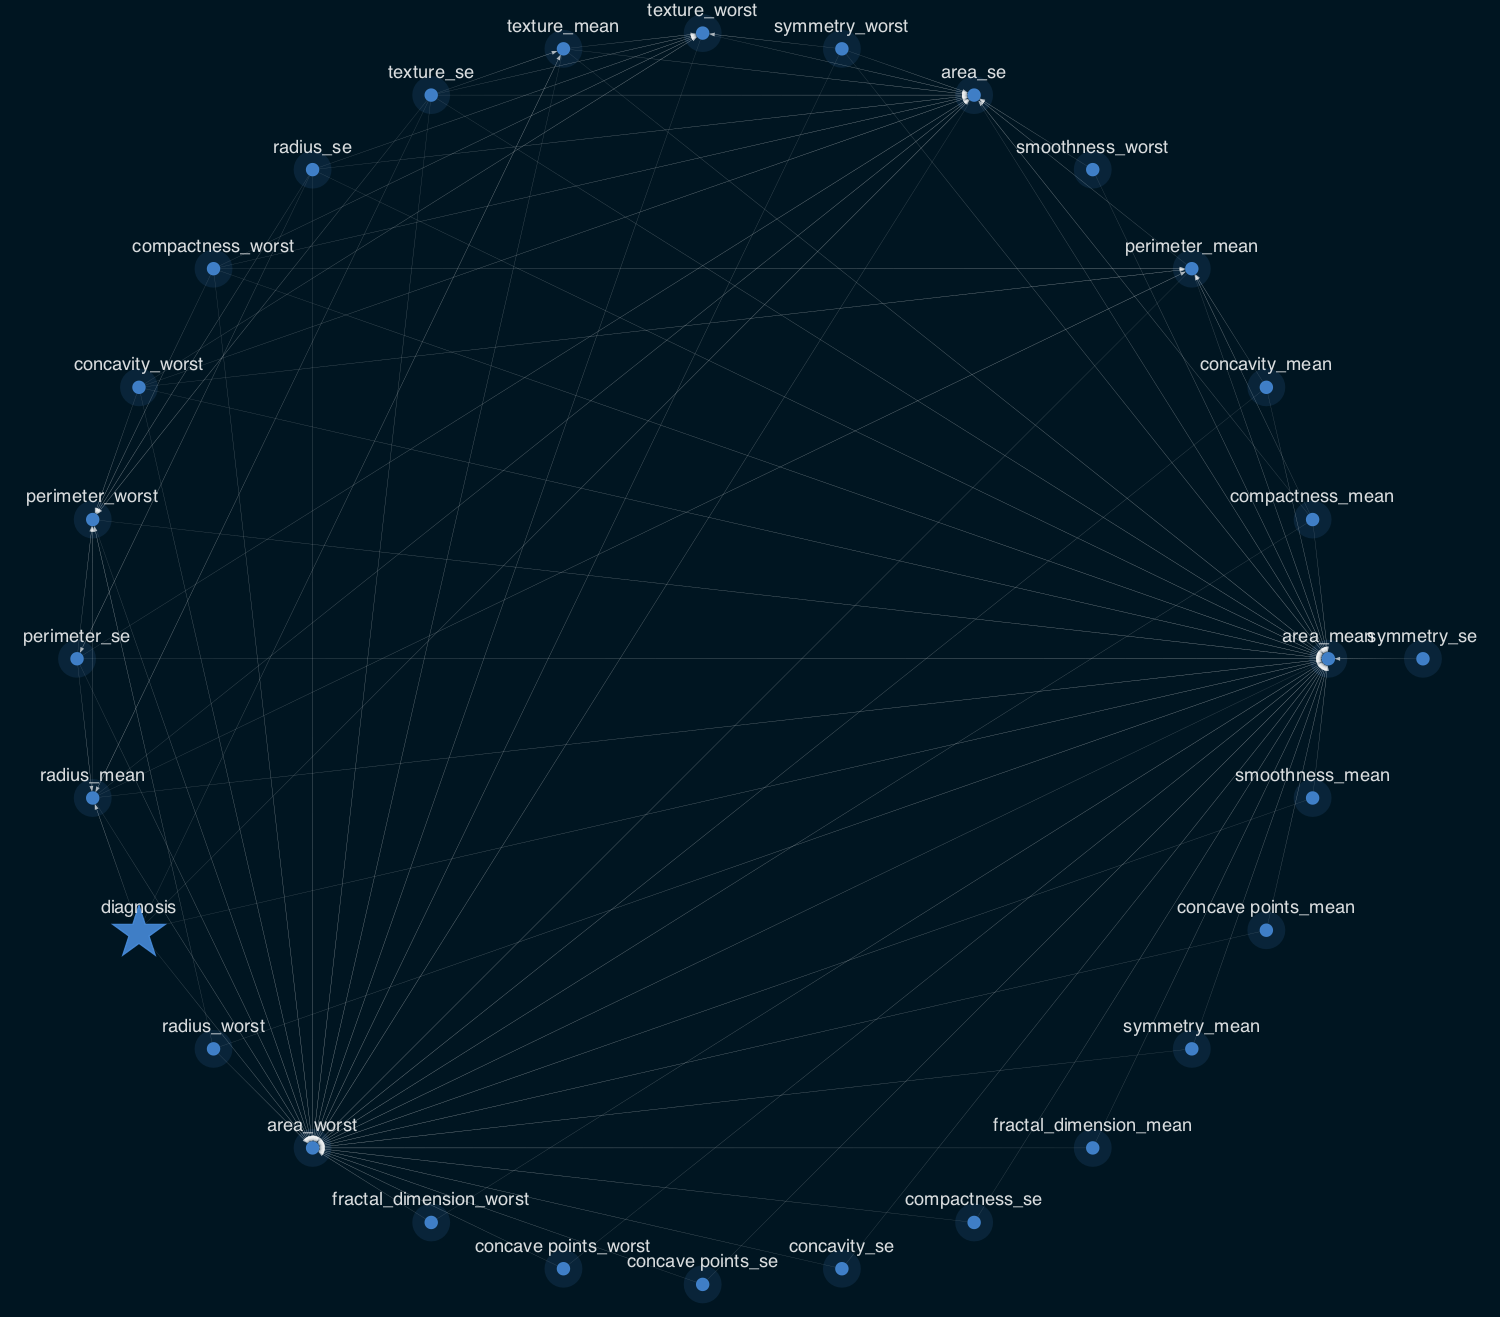

In [47]:
sm_data_bg = sm_data.get_largest_subgraph()
viz = plot_structure(
    sm_data_bg,
    prog="circo",
    graph_attributes={"scale": "1","size": 5},
    node_attributes=node_attributes,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

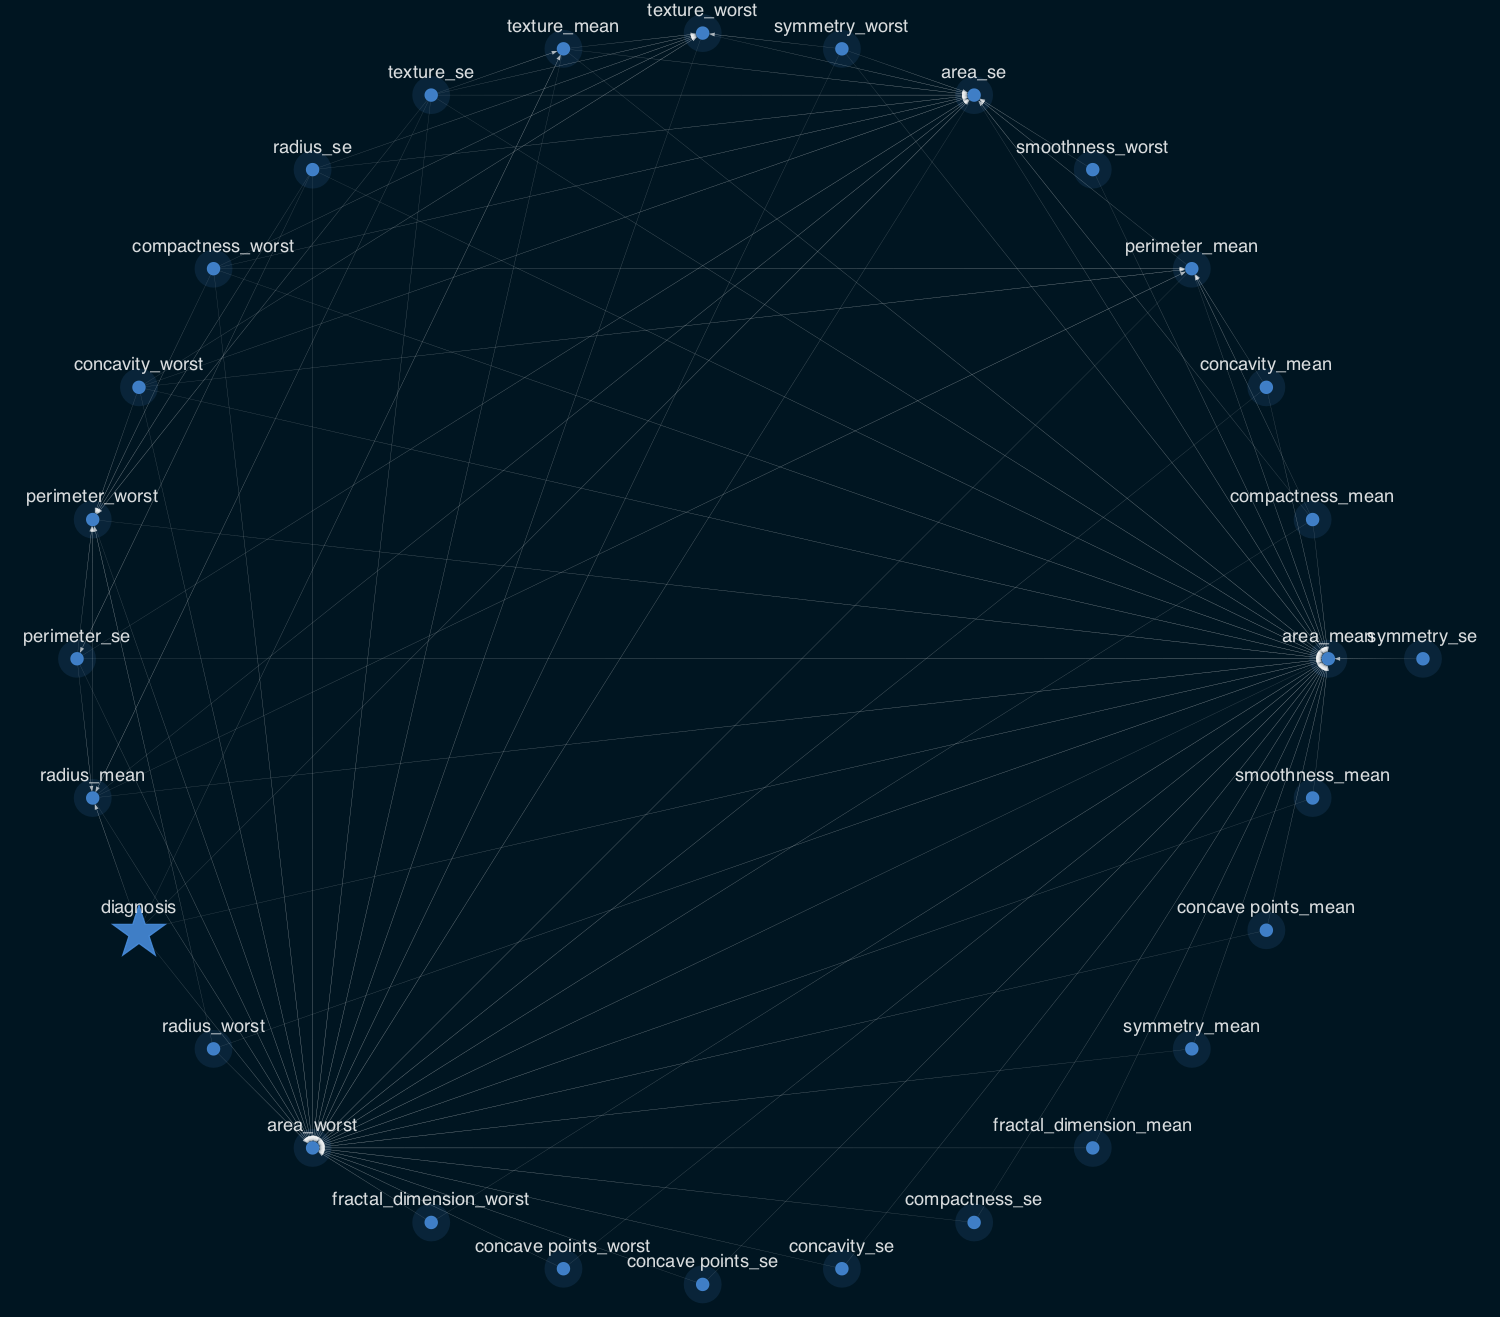

In [50]:
target = sm_data_bg.get_target_subgraph('diagnosis')
viz = plot_structure(
    target,
    prog="circo",
    graph_attributes={"scale": "1", "size": 5},
    node_attributes=node_attributes,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [62]:
edges = list(target.edges())
important_features_d1 = []
for start,end in edges:
    if start == 'diagnosis':
        important_features_d1.append(end)

important_features_d1

['radius_mean', 'texture_mean', 'area_mean', 'area_se', 'area_worst']

In [63]:
# Classify dataset within 100 Range
data_range_1 = X[:100]
data_range_2 = X[:200]
data_range_3 = X[:300]
data_range_4 = X[:400]

### Jaccard Similarity

In [64]:
def calculate_jaccard_similarity(scm_1: StructureModel, scm_2: StructureModel) -> float:
    scm_1_edges = scm_1.edges()
    scm_2_edges = scm_2.edges()

    intersection_edges = set(scm_1_edges).intersection(scm_2_edges)
    total_edges = len(scm_1_edges) + \
        len(scm_2_edges) - len(intersection_edges)

    value = len(intersection_edges) / total_edges

    return round(value, 2)

In [65]:
sm_range_1 = from_pandas(data_range_1.iloc[:, 1:])

In [66]:
calculate_jaccard_similarity(sm_data, sm_range_1)

0.1

In [73]:
drop_list1 = ['perimeter_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']
x_1 = X.drop(drop_list1,axis = 1 )
x_1.head()

,radius_mean,texture_mean,area_mean,area_se,area_worst
0,17.99,10.38,1001.0,153.40,2019.0
1,20.57,17.77,1326.0,74.08,1956.0
2,19.69,21.25,1203.0,94.03,1709.0
3,11.42,20.38,386.1,27.23,567.7
4,20.29,14.34,1297.0,94.44,1575.0


<AxesSubplot:>

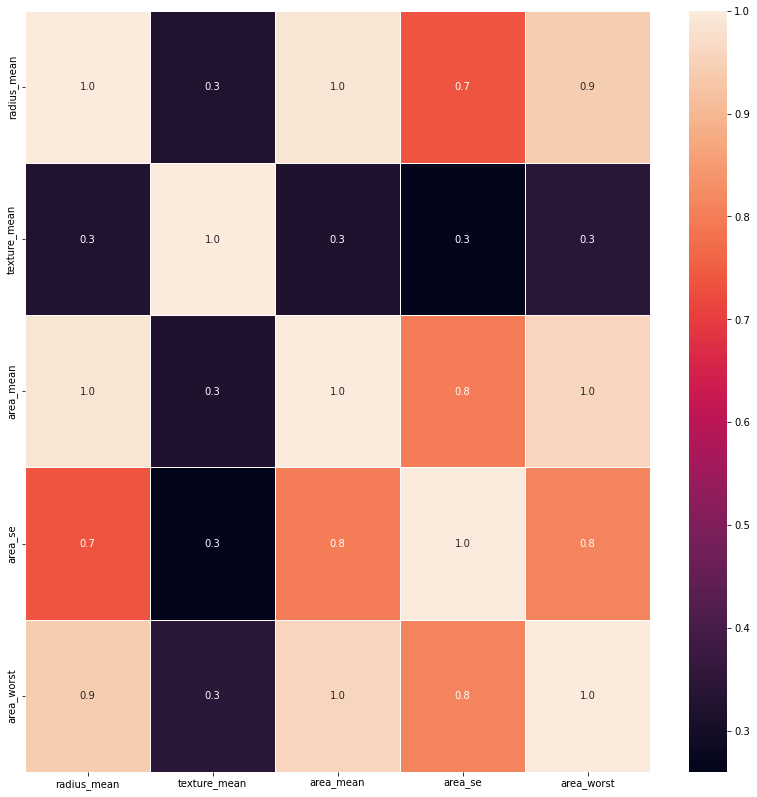

In [74]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.9532163742690059


<AxesSubplot:>

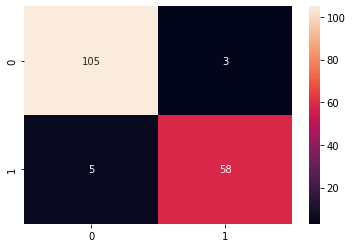

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

### The Acurracy of the RandomForestClassifier after Causal Inference is above 95 %